<a href="https://colab.research.google.com/github/sanikakarande/Machine-Learning/blob/main/Mental_Fitness_Tracker_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Libraries**
---



---



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import numpy as np
import pandas as pd

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import itertools


In [64]:
data = pd.read_csv('/content/Daylio_Abid.csv',low_memory=False)


In [38]:
data.head().style.set_properties(**{'background-color':'grey',
                                     'color': 'black'})

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | meditation | shower | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | travel | cleaning | new things | power nap | Documentary | penpal | coding,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting | walk | meditation | shower | Audio books | writing | Watching series | good meal | reddit | language learning | shave | streaming | youtube | cooking | cleaning | research | new things | power nap | repair | Documentary | penpal | coding | Tutorial,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Quran | walk | meditation | shower | podcast | Audio books | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | research | new things | designing | repair | Documentary | penpal | coding | Tutorial,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting | walk | meditation | Audio books | writing | Watching series | News Update | good meal | reddit | language learning | shave | streaming | youtube | cooking | research | new things | power nap | Documentary | penpal | coding | Tutorial,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | meditation | shower | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | cleaning | research | new things | power nap | Documentary | penpal | coding | Tutorial,Awful


**Data Cleaning**

---



---



In [39]:
data.isnull().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

**Dimensions of dataset**

---



---



In [40]:
print(data.shape)


(940, 7)


In [41]:
print(data.size)

6580


In [9]:
data["sub_mood"].value_counts()

blessed           174
focused           111
yolo              100
excited            91
confused           64
wondering          64
hungry             53
Cool               37
over the moon      34
weak               31
Chill              30
worried            28
meh                27
good               19
triggered          18
angry              16
sad af             13
scared              9
sick                8
happiest day        5
awful               4
bad                 4
Name: sub_mood, dtype: int64

**Statistical Summary**

---



---



In [42]:
print(data.describe())

         full_date    date    weekday     time  sub_mood  \
count          940     940        940      940       940   
unique         775     366          7      425        22   
top     14/02/2018  Mar-01  Wednesday  9:00 pm  blessed    
freq             4       7        139       65       174   

                           activities  mood  
count                             893   940  
unique                            839     5  
top     Dota 2 | streaming  | youtube  Good  
freq                               10   487  


**Data Visualisation**

---



---



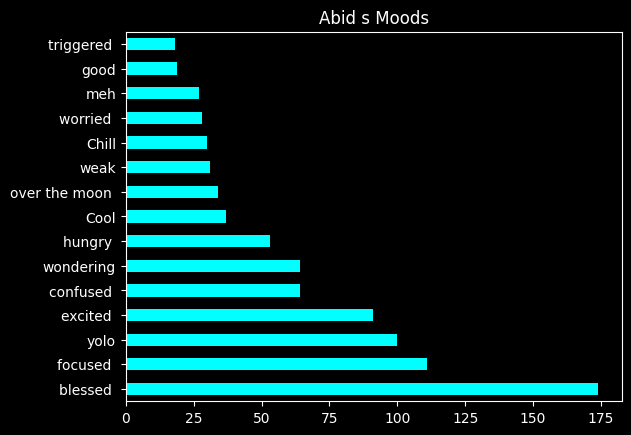

In [43]:
data["sub_mood"].value_counts()[:15].plot.barh(color='aqua', title='Abid s Moods');

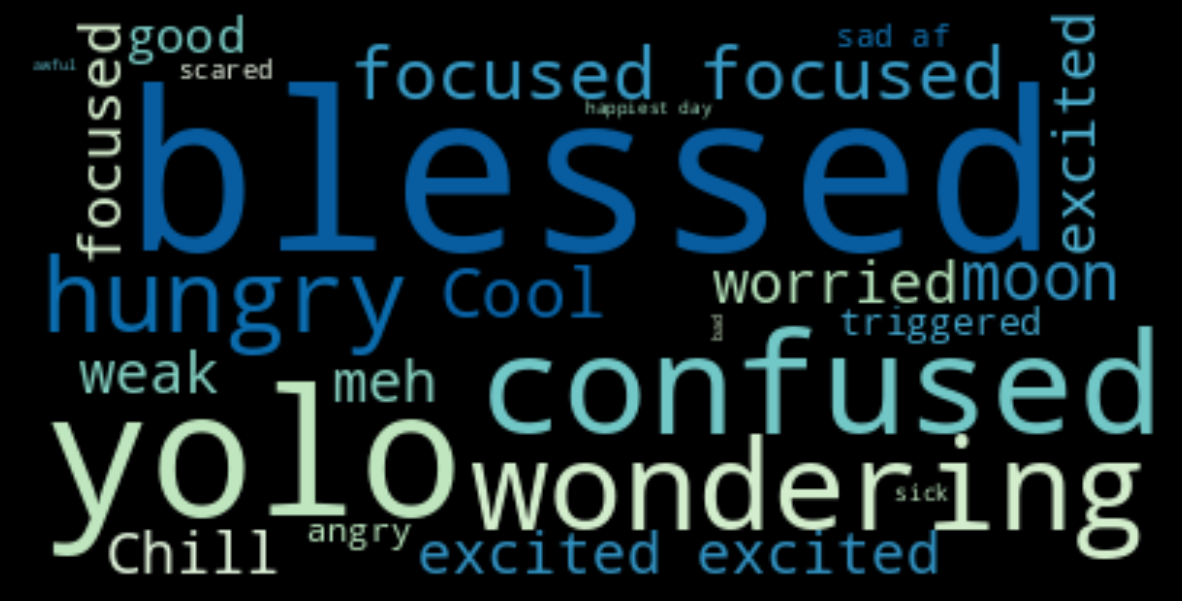

<Figure size 1000x600 with 0 Axes>

In [44]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.sub_mood)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

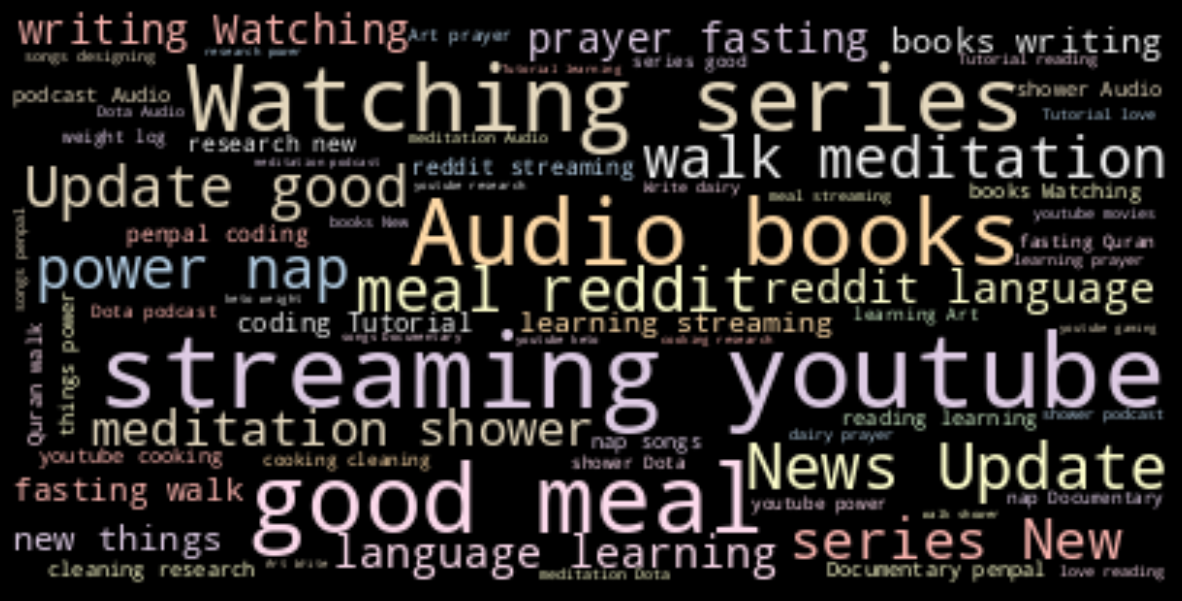

<Figure size 1000x600 with 0 Axes>

In [45]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.activities)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Pastel1', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

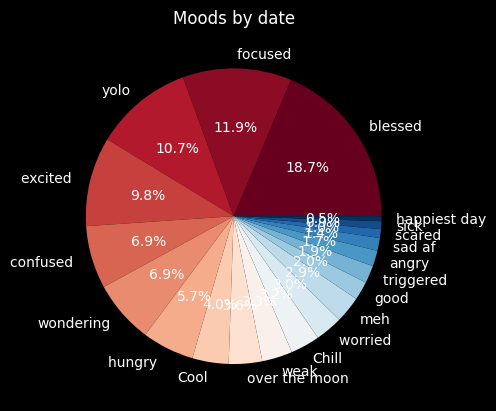

In [46]:
color = plt.cm.RdBu(np.linspace(0,1,20))
data["sub_mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Moods by date")
plt.axis("off")
plt.show()

**Training**

---



---



In [47]:
import plotly.graph_objects as px


# reading the database



plot = px.Figure(data=[px.Scatter(
	x=data['date'],
	y=data['sub_mood'],
	mode='markers',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "bar"],
					label="Bar Chart",
					method="restyle"
				)
			]),
			direction="down",
		),
	]
)

plot.show()


**Class Distribution**

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   940 non-null    object
 1   date        940 non-null    object
 2   weekday     940 non-null    object
 3   time        940 non-null    object
 4   sub_mood    940 non-null    object
 5   activities  893 non-null    object
 6   mood        940 non-null    object
dtypes: object(7)
memory usage: 51.5+ KB


In [49]:
data = data.replace({'Not Available': np.nan})

In [15]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [17]:
fig = px.bar(data, x= "weekday", y= "activities", color_discrete_sequence=['darksalmon'], title="Activities by Weekday")
fig.show()

In [18]:
fig = px.bar(data, x= "weekday", y= "mood", color_discrete_sequence=['#2B3A67'], title="Mood by Weekday")
fig.show()


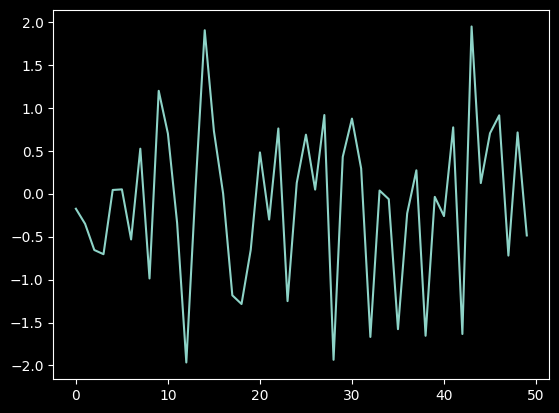

In [19]:
data=np.random.randn(50)
plt.style.use('dark_background')
plt.plot(data)
plt.show()

**Encoding**

---



---



In [21]:

TARGET = 'activities' #Target could Not be float otherwise will result in valueError: Unknown label type: 'continuous'. Even after the encoding.

label_cols = ['full_date', 'weekday', 'time', 'mood']
#numerical_cols = ['Altitude', 'Rainfall', 'Frosts', 'Year']

In [52]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(c):
    le = LabelEncoder()
    return le.fit_transform(c)

label_encoded_data = data[label_cols].apply(label_encoder)
#numerical_data = data[numerical_cols]
target_data = data[TARGET]

data = pd.concat([label_encoded_data, target_data], axis=1)

In [53]:
data.head()

,full_date,weekday,time,mood,activities
0,400,0,330,3,reading | Art | prayer | fasting | walk | med...
1,376,4,215,3,reading | learning | Art | prayer | fasting ...
2,352,6,218,4,reading | learning | prayer | fasting | Qura...
3,327,5,217,4,reading | learning | Art | prayer | fasting ...
4,303,1,415,1,reading | learning | fasting | walk | medita...
